In [1]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import camb.dark_matter
import numpy as np
import camb
from camb import camb as CAMB
from camb.constants import Mpc, const_pi, G, m_p, eV, hbar


In [2]:
#### 宇宙学参数
H0 = 67.5                 # Hubble 率
h = H0/100
omk = 0                   # 空间曲率
ombh2 = 0.022             # 重子物质
omdmh2 = 0.122            # 暗物质

##### 暗物质
######## CSF 参数
m_phi = 10**(-22)             # 粒子质量，单位 eV, 用于估算的 CSF 质量的推荐质量范围为 7.58e-26 eV 到 4.32e-33 eV
Num_density = 1e-22          # 粒子数密度， 单位 m^(-3)
omphih2 = 0.001             # 密度分数
dotR = 10**(-5)                  # CSF 的径向速度，单位 kg^(1/2)·m^(-1/2)

######## CDM
omch2 = omdmh2 - omphih2  # CDM

##### 有质量中微子
mnu = 0.06               # 中微子质量， eV


##### 再电离
tau = 0.06               # 再电离光深


##### 宇宙初始条件
As = 2e-9                # 标量功率谱振幅
ns = 0.965               # 标量谱指数

##### 非线性

halofit_version = 'mead'

##### CMB
lmax = 3000


In [3]:

#### CAMB 参数设置
pars = camb.set_params(H0 = H0, ombh2 = ombh2, omch2 = omch2, mnu = mnu, omk = omk, tau = tau,
                       As = As, ns = ns, halofit_version = halofit_version, lmax = lmax, 
                       m_phi = m_phi, Num_density = Num_density, omphih2 = omphih2, dotR = dotR,
                       All_DM_is_CDM = False, DM_include_CSF = True, dark_matter_model='DarkMatterCSF')


results = camb.get_results(pars)

results.set_params(pars)

results.DarkMatterData.get_phi = True

CAMB.csf_background(results.DarkMatterData,pars.DarkMatter,results)
CSFData = results.DarkMatterData




In [4]:
a_osc = CSFData.a_osc
a_wkb = CSFData.a_wkb

print('a_wkb =',a_wkb)
print('a_osc =',a_osc)

a_wkb = 0.00038627755095827746
a_osc = 3.8627755095827744e-05


In [5]:
a_arr = CSFData.a_arr
H_arr = CSFData.H_arr
rho_phi = CSFData.rho_phi
p_phi = CSFData.p_phi
w_phi = CSFData.w_phi
cs2 = CSFData.cs2
phi1 = CSFData.phi1_arr
phi2 = CSFData.phi2_arr
dotphi1 = CSFData.dotphi1_arr
dotphi2 = CSFData.dotphi2_arr


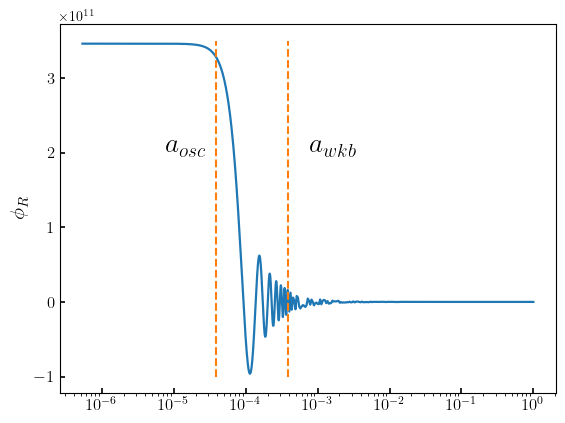

In [6]:


x1 = np.array([a_osc,a_osc])
x2 = np.array([a_wkb,a_wkb])
y1 = np.array([-1e11,3.5e11])
y2 = np.array([1e-40,-3e-40])




plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'


plt.plot(a_arr, phi1, color = 'C0',linewidth = 1.6)
plt.plot(x1,y1,ls='--',color = 'C1')
plt.plot(x2,y1,ls='--',color = 'C1')
plt.text(a_osc/5,2e11,r'$a_{osc}$',fontsize=20)
plt.text(2*a_wkb,2e11,r'$a_{wkb}$',fontsize=20)
plt.xscale("log")
plt.tick_params(axis = 'both',
                which = 'major',
                labelsize = 10,
                labelcolor='black',
                direction='in',
                width = 1.2)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.tick_params(axis="both",labelsize = 12)
# plt.xlabel(r'$a$',fontsize = 15)
plt.ylabel(r'$\phi_R$',fontsize = 15)
plt.show()

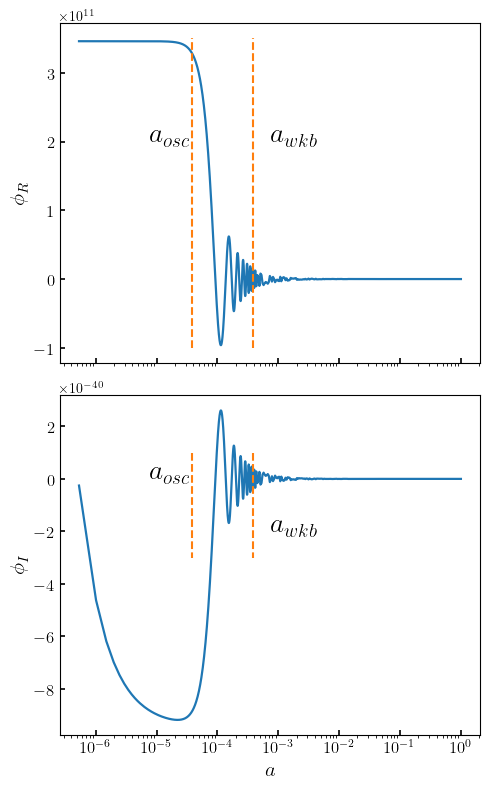

In [7]:
fig, ax = plt.subplots(2,1,sharex = True, figsize=(5,8))

gs = GridSpec(2,1,height_ratios = [0.5,0.5])

ax[0].plot(a_arr, phi1, color = 'C0',linewidth = 1.6)
ax[0].plot(x1,y1,ls='--',color = 'C1')
ax[0].plot(x2,y1,ls='--',color = 'C1')
ax[0].text(a_osc/5,2e11,r'$a_{osc}$',fontsize=20)
ax[0].text(2*a_wkb,2e11,r'$a_{wkb}$',fontsize=20)
ax[0].set_ylabel(r'$\phi_R$',fontsize = 15)
ax[0].tick_params(axis = 'both',
                which = 'major',
                labelsize = 10,
                labelcolor='black',
                direction='in',
                width = 1.2)
ax[0].tick_params(axis="both",labelsize = 12)


ax[1].plot(a_arr, phi2, color = 'C0',linewidth = 1.6)
ax[1].plot(x1,y2,ls='--',color = 'C1')
ax[1].plot(x2,y2,ls='--',color = 'C1')
ax[1].text(a_osc/5,0,r'$a_{osc}$',fontsize=20)
ax[1].text(2*a_wkb,-2e-40,r'$a_{wkb}$',fontsize=20)
ax[1].tick_params(axis = 'both',
                which = 'major',
                labelsize = 10,
                labelcolor='black',
                direction='in',
                width = 1.2)
plt.xscale("log")
ax[1].tick_params(axis="both",labelsize = 12)
ax[1].set_xlabel(r'$a$',fontsize = 15)
ax[1].set_ylabel(r'$\phi_I$',fontsize = 15)


plt.subplots_adjust(hspace=-0.1)
plt.tight_layout()
plt.savefig('phi.pdf')
plt.show()


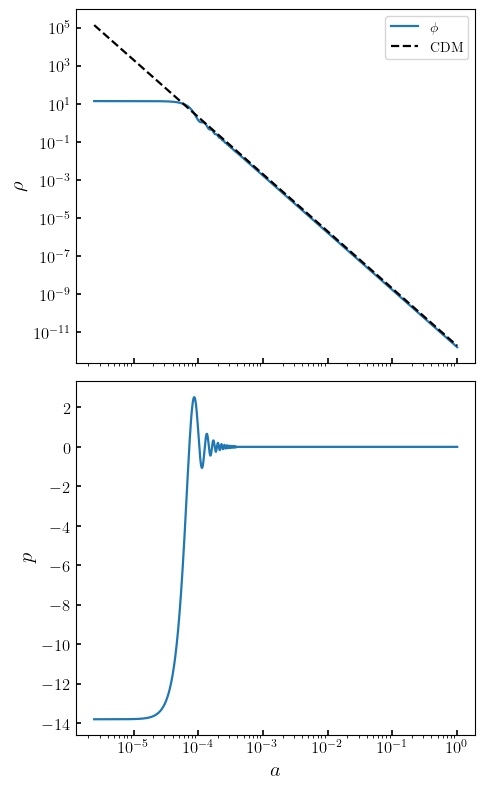

In [8]:

rhoCDM = 2e-12*np.array(a_arr)**(-3)


fig, ax = plt.subplots(2,1,sharex = True, figsize=(5,8))

ax[0].plot(a_arr[4:], rho_phi[4:], color = 'C0',linewidth = 1.6,label= r'$\phi$')
ax[0].plot(a_arr[4:], rhoCDM[4:], ls ='--', color = 'k',linewidth = 1.6,label= 'CDM')

ax[0].set_ylabel(r'$\rho$',fontsize = 15)
ax[0].tick_params(axis = 'both',
                which = 'major',
                labelsize = 10,
                labelcolor='black',
                direction='in',
                width = 1.2)
ax[0].tick_params(axis="both",labelsize = 12)
ax[0].set_yscale('log')
ax[0].legend()

ax[1].plot(a_arr[4:], p_phi[4:], color = 'C0',linewidth = 1.6)
ax[1].tick_params(axis = 'both',
                which = 'major',
                labelsize = 10,
                labelcolor='black',
                direction='in',
                width = 1.2)
plt.xscale("log")
ax[1].tick_params(axis="both",labelsize = 12)
ax[1].set_xlabel(r'$a$',fontsize = 15)
ax[1].set_ylabel(r'$p$',fontsize = 15)


plt.tight_layout()
plt.savefig('rho-p.pdf')
plt.show()



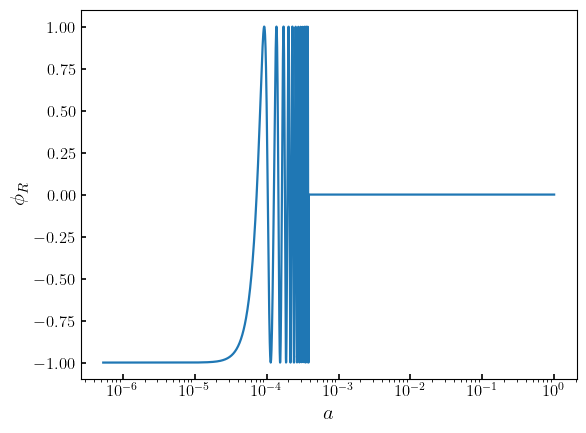

In [9]:


plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'


plt.plot(a_arr, w_phi, color = 'C0',linewidth = 1.6)

plt.xscale("log")
plt.tick_params(axis = 'both',
                which = 'major',
                labelsize = 10,
                labelcolor='black',
                direction='in',
                width = 1.2)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.tick_params(axis="both",labelsize = 12)
plt.xlabel(r'$a$',fontsize = 15)
plt.ylabel(r'$\phi_R$',fontsize = 15)
plt.show()